# 图像预处理
对图像进行去重、删除无效样本等操作，如果数据是自行拍摄、实验提取，那可能也需要根据实验要求进行一些删除、增加的处理。当我们将所有有效数据导入后，我们至少需要确保：

1）全部样本的尺寸是一致的（同时，全部样本的通道数是一致的）

2）图像最终以Tensor形式被输入卷积网络

3）图像被恰当地归一化

在PyTorch中，所有的数据预处理都可以在导入数据的时候，通过transform参数来完成，我们通常在
transform参数中填写torchvision.transforms这个模块下的类。在预处理时，我们需要使用的常规类如
下所示：

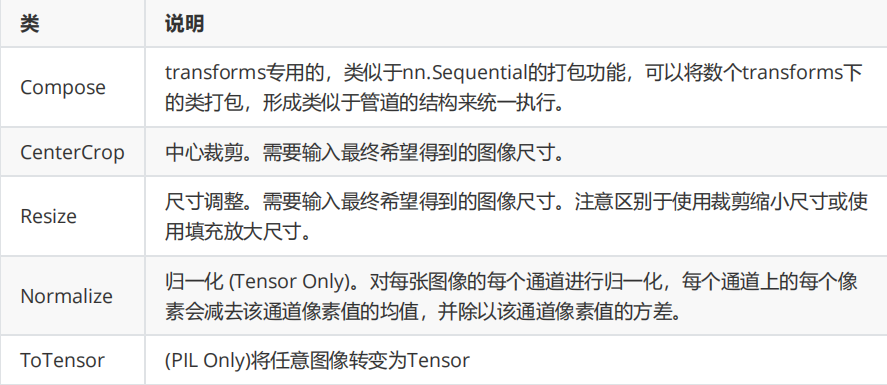

### 1.1 首先是用来调整尺寸的两个类：中心裁剪 transforms.CenterCrop() 以及 transforms.Resize() 。

In [1]:
import torch
import torchvision
from torchvision import transforms
from torch import nn


In [2]:
transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224)])# 放列表
#等价于
transform = nn.Sequential(transforms.Resize(256) ,transforms.CenterCrop(224))

### 1.2 调整完尺寸之后，需要对数据进行归一化，在这里使用的类是 transforms.Normalize()

归一化是以特征为单位进行的，每个特征会单独减去自己这个特征的均值，再除以这
个特征的标准差。

为了能够对通道上的全部像素进行计算，图像在被归一化之前必须被转化为Tensor。因此在实际中，我们常常将 transforms.Normalize() 常常和
transforms.ToTensor() 连用。


类 transforms.ToTensor() 已经带有归一化的功能：这个类会按照最大值
255，最小值0对图片数据进行归一化，将所有图像的像素值压缩到[0,1]之间。

torchvision.transforms.Normalize(mean, std, inplace=False)

分别代表需要减去的值和需要除以的值。


In [ ]:
transform = transforms.Compose([transforms.ToTensor()
 ,transforms.Normalize(0.5,0.5)])